In [120]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [121]:
data = pd.read_csv('./bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [122]:
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [123]:
X = data.drop('BodyFat', axis=1).values
y = data['BodyFat'].values

In [124]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## modeling

In [126]:
from sklearn.linear_model import Ridge

np.random.seed(42)

ridge = Ridge().fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8916355443946723

In [127]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

rf = RandomForestRegressor().fit(X_train, y_train)
rf.score(X_test, y_test)

0.8931496053011112

In [128]:
# 100 estimators
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
rf.score(X_test, y_test)

0.8962798023530191

## feature importance

In [129]:
ridge.coef_

array([-7.85069283,  0.24581003,  0.51385988, -0.06444253, -0.02859365,
        0.08603758,  0.40673697,  0.15341794, -0.10229361, -0.06361801,
       -0.17104529, -0.11909794,  0.03314908, -0.03780671])

In [130]:
feature_importance = dict(zip(data.columns, list(ridge.coef_)))
feature_importance

{'Density': -7.850692834778597,
 'BodyFat': 0.24581002635197588,
 'Age': 0.5138598828328862,
 'Weight': -0.0644425294858492,
 'Height': -0.028593645716911566,
 'Neck': 0.08603757615532072,
 'Chest': 0.40673696887189015,
 'Abdomen': 0.15341794291675717,
 'Hip': -0.10229361141626615,
 'Thigh': -0.06361801450005308,
 'Knee': -0.17104528676728759,
 'Ankle': -0.11909793877877084,
 'Biceps': 0.03314908435079507,
 'Forearm': -0.03780670790956926}

<AxesSubplot:title={'center':'Feature Importance (Ridge)'}>

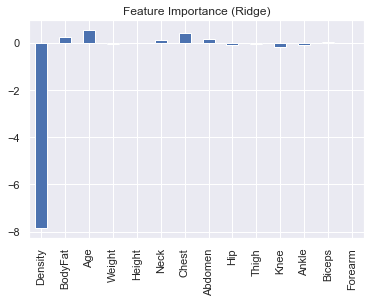

In [131]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance (Ridge)", legend=False)

In [132]:
rf.feature_importances_

array([9.80727880e-01, 9.06718261e-04, 1.79905858e-03, 3.42581406e-03,
       1.18004904e-03, 1.39802317e-03, 3.17224621e-03, 9.87060861e-04,
       9.06283583e-04, 2.63029663e-03, 2.89641952e-04, 3.55442878e-04,
       7.54614497e-04, 1.46687063e-03])

In [133]:
feature_importance = dict(zip(data.columns, list(rf.feature_importances_)))
feature_importance

{'Density': 0.980727879658587,
 'BodyFat': 0.0009067182612386728,
 'Age': 0.0017990585792660814,
 'Weight': 0.003425814057417531,
 'Height': 0.0011800490355276228,
 'Neck': 0.0013980231676499128,
 'Chest': 0.0031722462054550866,
 'Abdomen': 0.0009870608606560346,
 'Hip': 0.0009062835830795982,
 'Thigh': 0.0026302966301097355,
 'Knee': 0.0002896419523440783,
 'Ankle': 0.00035544287846712725,
 'Biceps': 0.0007546144967477327,
 'Forearm': 0.0014668706334538778}

<AxesSubplot:title={'center':'Feature Importance (RandomForest)'}>

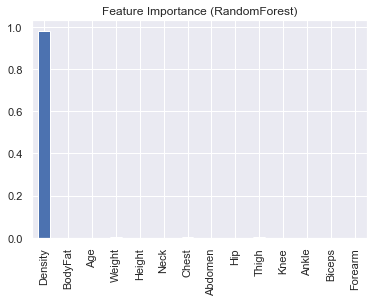

In [134]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance (RandomForest)", legend=False)

In [135]:
y_pred = rf.predict(X_test)
y_pred, y_test

(array([20.916, 20.96 , 32.559, 22.603, 17.538, 11.762, 26.02 , 20.193,
        11.071, 11.371, 29.977, 27.822, 15.475, 25.222,  4.538,  3.396,
        24.483, 22.822, 22.287, 12.819, 15.687, 17.457, 14.008, 13.608,
        23.357, 34.709, 26.851, 15.531,  5.779, 13.08 , 28.327,  8.581,
        18.62 , 19.612, 20.275,  3.598, 24.249, 16.827, 17.468, 10.664,
        14.227, 26.731, 34.423,  8.349, 13.967, 25.195, 33.445, 24.339,
        26.064,  8.87 , 39.554]),
 array([19.2, 19.2, 28. , 20.5, 16.7, 12.1, 23.6, 18.6, 11.7, 11.9, 26.1,
        24.5, 14.8, 22.5,  6.3,  5.3, 22. , 20.9, 20.4, 14. , 14.9, 16.5,
        13.9, 13.8, 21.3, 30.4, 23.6, 15. ,  7.1, 13. , 24.9,  9.6, 17.5,
        18.4, 18.7,  3.7, 21.4, 16. , 16.6, 11.5, 13.8, 23.6, 31.2,  9.4,
        13.9, 22.5, 29. , 21.5, 23.3,  9.9, 35.2]))

In [136]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f" MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f" R2: {r2_score(y_test, y_pred):.2f}")
print(f" MAE: {mean_absolute_error(y_test, y_pred):.2f}") # rata-rata beda 4

 MSE: 4.82
 R2: 0.90
 MAE: 1.80
